# Machine Learning Final Project: Predicting chances of graduate school  admission 

**Group members: Zion Adeyanju, Muhammad Asghar**

**Description:**

This dataset is created for prediction of Graduate Admissions 

**Data Content:**

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores (out of 340) 2. TOEFL Scores (out of 120) 3. University Rating (out of 5) 4. Statement of Purpose and Letter of Recommendation Strength (out of 5) 5. Undergraduate GPA (out of 10) 6. Research Experience (either 0 or 1) 7. Chance of Admit (ranging from 0 to 1)

**Dataset:**  Graduate Admissions -> Admission_Predict.csv was download from Kaggle Data Sources 

In [1]:
#Please note that this machine learning project was developed using Google collabs 
#Some syntaxs might be different



#Task 1 import dataset from local drive into google collab jupyter notebook instance 
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# changed to run in jupyter, imported from local drive
import os
import pandas as pd
import io

cur_path = os.getcwd()
datapath = cur_path
os.listdir(datapath)

os.chdir(r"C:\Users\Muhammad\Desktop\Machine Learning\Files\Graduate Admissions")

In [2]:
# Covert each csv to a pandas dataframe for better data analysis tools.
train_data = pd.read_csv('Admission_Predict_Ver1.1.csv')

# **Analysis of the Data: Data preparation**

In [3]:
# find out the properties of the train data to 
# analysis what features can be important in training an accurate model.


train_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
train_data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
train_data.shape

(500, 9)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [7]:
train_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import pandas 
import seaborn as sns
%matplotlib inline

Let's analyze the distribution and correlation between the different column data. This would help to find important columns to insert in our feature set, and what models might perform best.

Not Having Research: 220
Having Research: 280


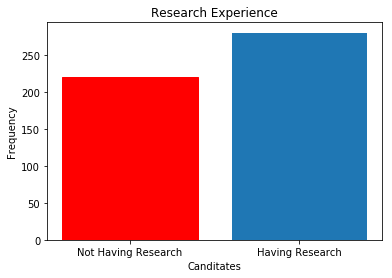

In [9]:
print("Not Having Research:", len(train_data[train_data.Research == 0]))
print("Having Research:", len(train_data[train_data.Research == 1]))
y = np.array([len(train_data[train_data.Research == 0]), len(train_data[train_data.Research == 1])])
x = ["Not Having Research", "Having Research"]


b = plt.bar(x,y)
b[0].set_color('r')
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

In [10]:
import seaborn as sns

C:\Users\Muhammad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


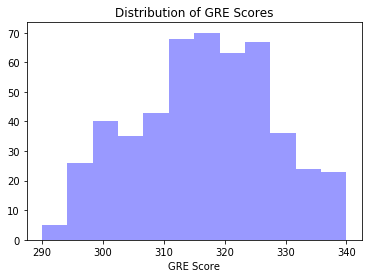

In [11]:
d_graph = sns.distplot(train_data['GRE Score'], kde=False, color = 'b')
plt.title("Distribution of GRE Scores")
plt.show()

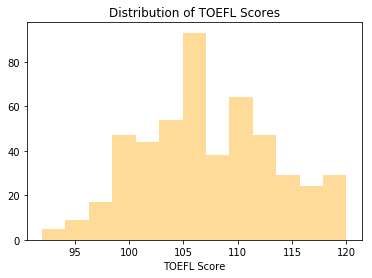

In [12]:
d_graph = sns.distplot(train_data['TOEFL Score'], kde=False, color = 'orange')
plt.title("Distribution of TOEFL Scores")
plt.show()

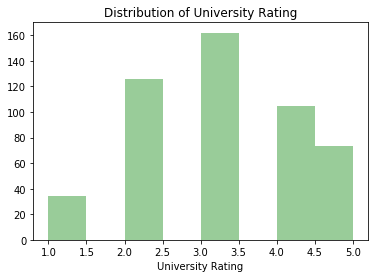

In [13]:
d_graph = sns.distplot(train_data['University Rating'], kde=False, color = 'green')
plt.title("Distribution of University Rating")
plt.show()

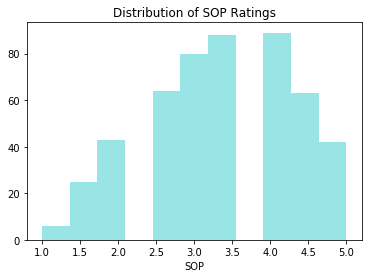

In [14]:
d_graph = sns.distplot(train_data['SOP'], kde=False, color = 'c')
plt.title("Distribution of SOP Ratings")
plt.show()

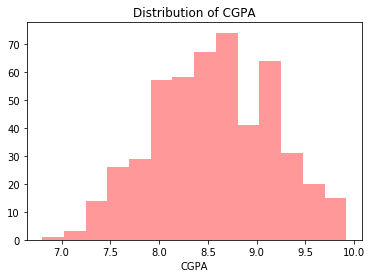

In [15]:
d_graph = sns.distplot(train_data['CGPA'], kde=False, color = 'r')
plt.title("Distribution of CGPA")
plt.show()

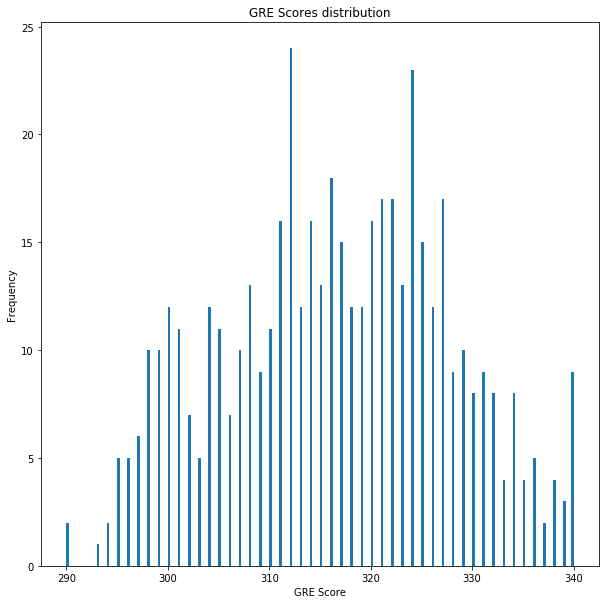

In [16]:
train_data["GRE Score"].plot(kind = 'hist', bins = 200, figsize = (10, 10))
plt.title("GRE Scores distribution")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

Understanding the data by inquiring on possible relationships between data features and outcome. By doing this we can find what features are more relevant creating a more accurate and valid prediction. We can start by visualizing the relationship between GRE Score and TOEFL to the chances of admitance.

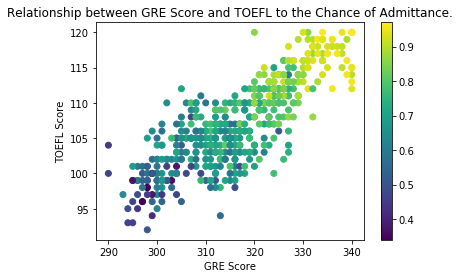

In [17]:
plt.scatter(train_data.iloc[:, 1], train_data.iloc[:, 2], c=train_data['Chance of Admit '])
plt.title("Relationship between GRE Score and TOEFL to the Chance of Admittance.")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.colorbar()

plt.show()

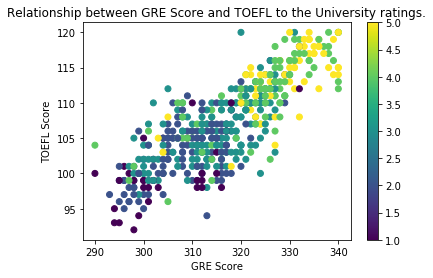

In [18]:
plt.scatter(train_data.iloc[:, 1], train_data.iloc[:, 2], c=train_data['University Rating'])
plt.title("Relationship between GRE Score and TOEFL to the University ratings.")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.colorbar()

plt.show()

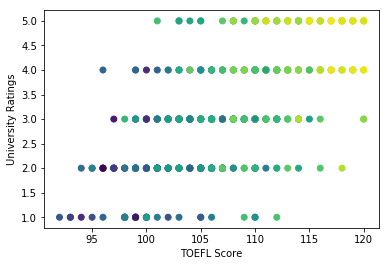

In [19]:
plt.scatter(train_data.iloc[:, 2], train_data.iloc[:, 3], c=train_data['Chance of Admit '])

plt.xlabel("TOEFL Score")
plt.ylabel("University Ratings")
plt.show()

# **Building tools to Evaluate Models**

Assigning and splitting the datasets into Train and Test data
, and making adjustments to certain data columns to allow for compatiblity with the 
machine learning  models.





1. Intial split of the train data into the features and target columns, to get it ready to fit a machine learning model.
2. Converted to a dataframe model inorder to perform some actions and get it in a trainable format.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils


X = train_data.drop(['Chance of Admit '], axis = 1)
y = train_data['Chance of Admit ']

#Serial No. is found to be an insignificant data present in our dataset
#our hypothesis is that it would not affect the outcome of a prediction 
#Serial No is droppped
X = train_data.drop(['Serial No.'], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle = False)


# We have to convert the target column Y into binary 0,1 value at 0.72 (72%) to help make it 
# possible to be used for training our models 
# '0' == no Chance to be admitted 
# '1' == A Chance to be admitted 

y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_validate 
from sklearn.metrics import roc_curve 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

Employing the use of multiple machine learning models to see what would be the right model.


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_1= KNeighborsClassifier()

from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()

from sklearn.linear_model import SGDClassifier
model_3 = SGDClassifier(loss = 'modified_huber')

from sklearn.tree import DecisionTreeRegressor
model_4 = DecisionTreeRegressor()

# from sklearn import svm
# model_3 = svm.SVR()

Now let's write a function that automatically trains for all the models and also give us a performance result of our predictions for each model we train.

In [23]:
# a function to provide the performance metrics of the model 
# Mean Square Error 
# Acuracy Score of Prediction
# Confusion matrix
# precision score 
# recall score

def show_performance_of_model(predictions):
    true_val = y_test_binary 
    print(name, "Mean Squared Error =", (np.sqrt(mean_squared_error(true_val, predictions))))

    acc_of_prediction = accuracy_score(predictions, true_val)
    print("Acuracy Score of Prediction =", acc_of_prediction * 100)

    cm = confusion_matrix(true_val, predictions)
    print('Confusion Matrix =', cm)

    ps = precision_score(true_val, predictions, average = None)
    print('Precision Score =', ps)

    rs = recall_score(true_val, predictions, average = None)
    print('Recall Score =', rs)

In [24]:
# a function the evaluate the prediction of the different modules against each other 
# using the roc curve

def evaluate_myprediction(name, y_test_binary, predictionScore):
    fpr, tpr, thresholds = roc_curve(y_test_binary, predictionScore[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right") 

In [25]:
# creating function to automatically cycle through our models and initiate the fit method

def train_model(model):
    model.fit(X_train, y_train_binary)
    predictions = model.predict(X_test)
    show_performance_of_model(predictions)

In [26]:
# models = [name of model, model]

models = [['KNeighborsClassifier', model_1], ['LogisticRegression', model_2], ['SGDClassifier', model_3], ['DecisionTreeRegressor', model_4]]


for name, model in models:
  
    try:
        train_model(model)
        predictionScore = model.predict_proba(X_test)
        #print (predictionScore[:,1])
        evaluate_myprediction(name, y_test_binary, predictionScore)
        print('\n', '\n')

    except Exception as e: 
        print(e)

KNeighborsClassifier Mean Squared Error = 0.2645751311064591
Acuracy Score of Prediction = 93.0
Confusion Matrix = [[52  4]
 [ 3 41]]
Precision Score = [0.94545455 0.91111111]
Recall Score = [0.92857143 0.93181818]
name 'metrics' is not defined
LogisticRegression Mean Squared Error = 0.3872983346207417
Acuracy Score of Prediction = 85.0
Confusion Matrix = [[44 12]
 [ 3 41]]
Precision Score = [0.93617021 0.77358491]
Recall Score = [0.78571429 0.93181818]
name 'metrics' is not defined
SGDClassifier Mean Squared Error = 0.7483314773547883
Acuracy Score of Prediction = 44.0
Confusion Matrix = [[ 0 56]
 [ 0 44]]
Precision Score = [0.   0.44]
Recall Score = [0. 1.]
name 'metrics' is not defined
DecisionTreeRegressor Mean Squared Error = 0.0
Acuracy Score of Prediction = 100.0
Confusion Matrix = [[56  0]
 [ 0 44]]
Precision Score = [1. 1.]
Recall Score = [1. 1.]
'DecisionTreeRegressor' object has no attribute 'predict_proba'


C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# **Discussion**

I  hypothetically choose Logistic Regression as the best model to use for such a data set, although the accuracy of its prediction was overall good, it was outperformed by the KNeighborsClassifier and the Decision tree Regressor.  The SGDClassifier perform worse than the other models and would not be a suitable model to utilize in this case.

**Note:**
Dropping the Serial No. column greatly improved the prediction accuracy of all the models, we found it a good call to drop it from the feature dataset.